In [1]:
#libarary
import pandas as pd
#from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#1. import data
train = pd.read_csv('/Users/jitxu/Documents/ML_Training/HousePrice/train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [8]:
numerics = [ 'int64',  'float64']
train_numeric = train.select_dtypes(include=numerics)
test_numeric = test.select_dtypes(include=numerics)

In [9]:
train_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Training

## 1. Ordinary Linear Regression

In [11]:
#initialization
#knn = KNeighborsRegressor(n_neighbors=5)
reg = linear_model.LinearRegression(normalize=False)

In [12]:
# prepare independent and target, then split it into train and validation
X = train_numeric.drop(['SalePrice'],axis=1)
y = train_numeric['SalePrice']
X = X.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
# learning
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
615,616,85,80.0,8800,6,7,1963,1963,156.0,763,...,480,120,0,0,0,0,0,0,5,2010
613,614,20,70.0,8402,5,5,2007,2007,0.0,206,...,0,0,30,0,0,0,0,0,12,2007
1303,1304,20,73.0,8688,7,5,2005,2005,228.0,0,...,834,208,59,0,0,0,0,0,4,2006
486,487,20,79.0,10289,5,7,1965,1965,168.0,836,...,515,0,0,0,0,0,0,0,6,2007
561,562,20,77.0,10010,5,5,1974,1975,0.0,1071,...,418,240,38,0,0,0,0,0,4,2006


In [33]:
X_train_example = X_train[['MSSubClass']]

In [35]:
X_train_example.head()

,MSSubClass
615,85
613,20
1303,20
486,20
561,20


In [40]:
reg_example = linear_model.LinearRegression(normalize=False)
reg_example.fit(X_train_example, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
reg_example.coef_

array([-179.10725184])

In [42]:
reg_example.intercept_

191296.17520361536

In [ ]:
X_test_example

In [27]:
reg.coef_

array([ -2.64613914e+00,  -1.86787528e+02,  -2.50219767e+01,
         4.27793629e-01,   1.81222695e+04,   3.43131753e+03,
         2.98025389e+02,   1.72208107e+02,   2.28983600e+01,
         6.76608534e+00,  -2.33395599e+00,  -1.69796787e+00,
         2.73416149e+00,   4.36353101e+00,   2.48374533e+00,
         2.39061792e+01,   3.07534556e+01,   1.17295665e+04,
        -1.42779111e+02,   5.38048088e+03,   1.72240059e+01,
        -9.91240978e+03,  -1.42252757e+04,   7.02404082e+03,
         4.94422856e+03,  -1.33428318e+01,   1.70968068e+04,
         7.41808534e+00,   2.83839443e+01,  -1.48438492e+01,
         1.64063233e+01,   4.89568601e+01,   9.16307120e+01,
        -1.54739895e+02,  -1.19764636e+00,  -3.59095308e+01,
        -1.36064601e+02])

In [32]:
reg.intercept_

-687299.54371673393

In [31]:
X_test.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
892,893,20,70.0,8414,6,8,1963,2003,0.0,663,...,264,192,0,0,0,0,0,0,2,2006


In [14]:
# validation prediction MSE
y_test_pred = reg.predict(X_test)
mean_squared_error(y_test, y_test_pred)

1538566819.4192553

In [16]:
# train prediction MSE
y_train_pred = reg.predict(X_train)
mean_squared_error(y_train, y_train_pred)

1079459509.7923293

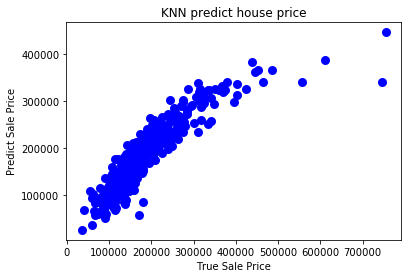

In [17]:
#plot
plt.scatter(y_test, y_test_pred, color='blue', linewidth=3)
plt.xlabel("True Sale Price")
plt.ylabel("Predict Sale Price")
plt.title("KNN predict house price")
plt.show()

## Ridge

In [24]:
reg_ridge = linear_model.Ridge (alpha = .1)
# learning
reg_ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
# validation prediction MSE
y_test_pred = reg_ridge.predict(X_test)
mean_squared_error(y_test, y_test_pred)

1538537399.9714875

In [26]:
# train prediction MSE
y_train_pred = reg_ridge.predict(X_train)
mean_squared_error(y_train, y_train_pred)

1079459643.3705466

# Submission

In [18]:
test_numeric = test_numeric.fillna(0) #fill na to 0
test_numeric_pred = reg.predict(test_numeric) # use knn to predict test_numeric
#test_numeric['SalePrice'] = test_numeric_pred
#result = test_numeric[['Id','SalePrice']]
#result.to_csv('submission_knn_version_0.csv',index=False)

In [19]:
test_numeric['SalePrice'] = test_numeric_pred
result = test_numeric[['Id','SalePrice']]
result.to_csv('submission_linear_version_0.csv',index=False)